In [60]:
import scanpy as sc
import scFates as scf


In [61]:
sc.set_figure_params()
scf.set_figure_pubready()

In [62]:
adata=sc.read("data/adata_assigned.h5ad")

In [63]:
adata.obs.NCC=adata.obs.NCC.astype(str)
adata_nohub=adata[adata.obs.Hub_leiden=="False"]
adata_noNCC=adata[adata.obs.NCC=="False"]
sc.tl.rank_genes_groups(adata_nohub,groupby="NCC",method="wilcoxon")
sc.tl.rank_genes_groups(adata_noNCC,groupby="Hub_leiden",method="wilcoxon")
df_noNCC=sc.get.rank_genes_groups_df(adata_noNCC,group="True",pval_cutoff=0.001).set_index("names")
df_nohub=sc.get.rank_genes_groups_df(adata_nohub,group="True",pval_cutoff=0.001).set_index("names")
df_noNCC=df_noNCC.loc[df_noNCC.scores>0]
df_nohub=df_nohub.loc[df_nohub.scores>0]

Trying to set attribute `.obs` of view, copying.
... storing 'NCC' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NCC' as categorical


In [64]:
import pandas as pd
tfs=pd.read_table("scenic/mm_mgi_tfs.txt",header=None).values.ravel()

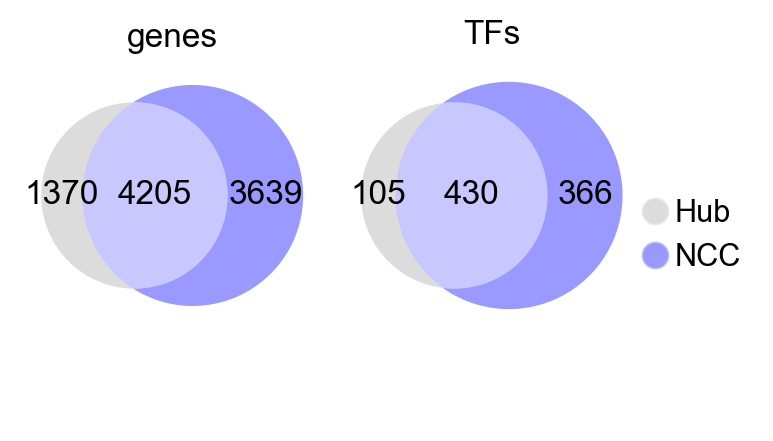

In [133]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
df_noNCC=sc.get.rank_genes_groups_df(adata_noNCC,group="True",pval_cutoff=0.001).set_index("names")
df_nohub=sc.get.rank_genes_groups_df(adata_nohub,group="True",pval_cutoff=0.001).set_index("names")
df_noNCC=df_noNCC.loc[df_noNCC.scores>0]
df_nohub=df_nohub.loc[df_nohub.scores>0]

common=pd.Series("common",index=df_nohub.index[df_nohub.index.isin(df_noNCC.index)])
NCC=pd.Series("NCC",df_nohub.index[~df_nohub.index.isin(df_noNCC.index)])
Hub=pd.Series("Hub",df_noNCC.index[~df_noNCC.index.isin(df_nohub.index)])
Genes=pd.DataFrame(pd.concat([common,NCC,Hub]),columns=["class"])


fig,axs=plt.subplots(2,2,gridspec_kw=dict(hspace=.05,wspace=.05,height_ratios=[10,2]),figsize=(4,2.5))

gs = axs[1, 0].get_gridspec()
ax1 =axs[0,0]
ax2 =axs[0,1]

for ax in axs[1, :]:
    ax.remove()

venn2([set(df_noNCC.index), set(df_nohub.index)],set_labels = ('', ''),set_colors=('darkgrey', 'blue'),ax=ax1)
df_noNCC=df_noNCC.loc[df_noNCC.index.isin(tfs)]
df_nohub=df_nohub.loc[df_nohub.index.isin(tfs)]

common=pd.Series("common",index=df_nohub.index[df_nohub.index.isin(df_noNCC.index)])
NCC=pd.Series("NCC",df_nohub.index[~df_nohub.index.isin(df_noNCC.index)])
Hub=pd.Series("Hub",df_noNCC.index[~df_noNCC.index.isin(df_nohub.index)])
TFs=pd.DataFrame(pd.concat([common,NCC,Hub]),columns=["class"])

venn2([set(df_noNCC.index), set(df_nohub.index)],set_labels = ('', ''),set_colors=('darkgrey', 'blue'),ax=ax2)
ax1.set_title("genes")
ax2.set_title("TFs")



legend_elements = [Line2D([0], [0], marker='o', color='w', label='Hub',
                          markerfacecolor='darkgrey',alpha=.4, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='NCC',
                          markerfacecolor='blue',alpha=.4, markersize=10)]

ax3 = fig.add_subplot(gs[1, :])
ax3.legend(handles=legend_elements, bbox_to_anchor=(1.2, 4.05),ncol=1,frameon=False)
ax3.axis("off")
plt.savefig("figures/figev3b.pdf",bbox_inches="tight")

In [66]:
Genes["TF"]=Genes.index.isin(tfs)

In [67]:
Genes.to_csv("NCC_vs_Hub.csv")

In [68]:
common=pd.Series("common",index=df_nohub.index[df_nohub.index.isin(df_noNCC.index)])
NCC=pd.Series("NCC",df_nohub.index[~df_nohub.index.isin(df_noNCC.index)])
Hub=pd.Series("Hub",df_noNCC.index[~df_noNCC.index.isin(df_nohub.index)])
TFs=pd.DataFrame(pd.concat([common,NCC,Hub]),columns=["class"])

In [69]:
Genes

,class,TF
names,,
Hmga2,common,True
Igf2bp1,common,False
Pabpc1,common,False
Hn1l,common,False
Grb10,common,False
...,...,...
Sar1b,Hub,False
Rab3gap2,Hub,False
Ly96,Hub,False


In [70]:
adata_NC=sc.read("../../../NeuCrest/adata_soldatov.h5ad")

In [71]:
adata_NC

AnnData object with n_obs × n_vars = 1107 × 1169
    obs: 'clusters'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'weights'

In [72]:
adata_sub=adata[adata.obs.plates.str.contains("_15_")]

In [73]:
na=[]
for n in adata_sub.obs_names:
    sp=n.split("_")[2].split(":")
    na.append("p"+sp[0][-2:]+"_"+sp[1])

In [74]:
adata_sub.obs_names=na

In [75]:
adata_sub.obs_names_make_unique()

In [76]:
adata_NC_sub=adata_NC[adata_NC.obs_names.isin(adata_sub.obs_names)]

In [77]:
adata_sub[adata_NC_sub.obs_names]

View of AnnData object with n_obs × n_vars = 553 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Hub_colors', 'assignments_colors', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

In [78]:
adata_NC_sub.obsm["X_umap"]=adata_sub[adata_NC_sub.obs_names].obsm["X_umap"]

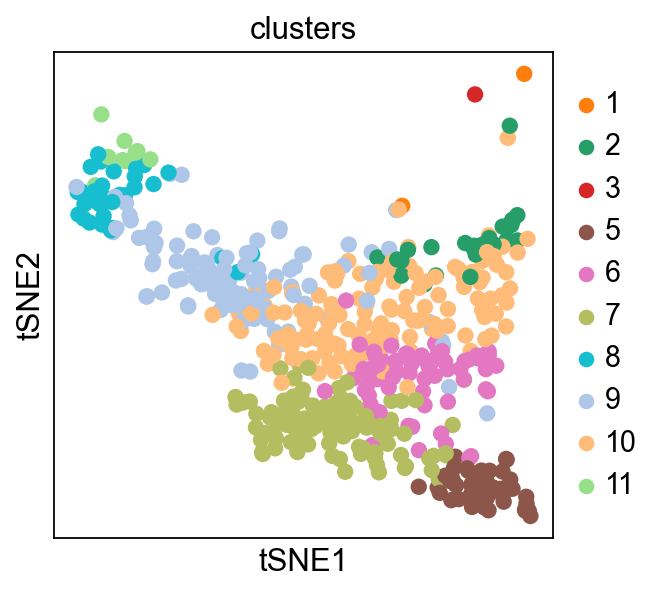

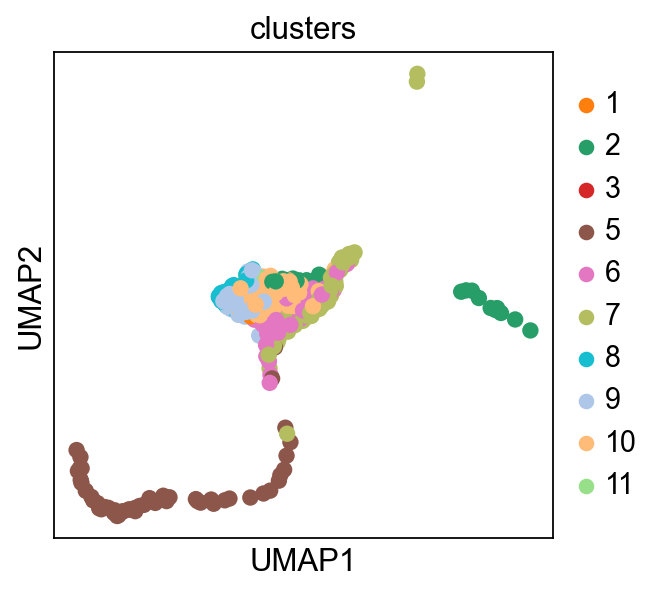

In [79]:
sc.pl.tsne(adata_NC_sub,color="clusters")
ax=sc.pl.umap(adata_NC_sub,color="clusters",show=False)

In [80]:
xlim=ax.get_xlim()
ylim=ax.get_ylim()

In [81]:
ylim

(-7.234045672416687, 8.95258824825287)

... storing 'NCC' as categorical


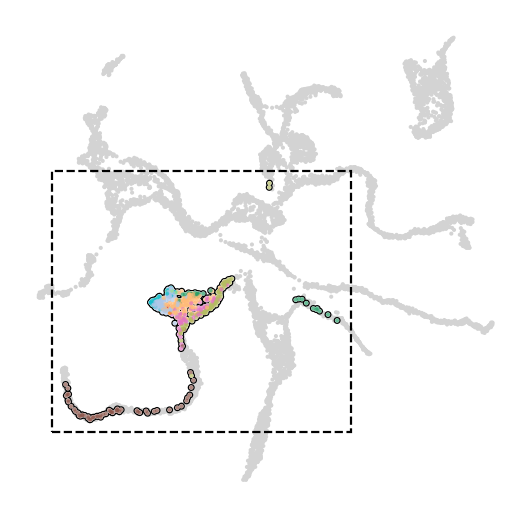

In [82]:
from matplotlib.patches import Rectangle
ax=sc.pl.umap(adata,show=False)
si=ax.collections[0].get_sizes()
sc.pl.umap(adata_NC_sub,color="clusters",ax=ax,size=si[0],legend_loc="none",
           add_outline=True,title="",frameon=False,show=False)

rec=Rectangle((xlim[0],ylim[0]),xlim[1]-xlim[0],ylim[1]-ylim[0],fill=None, alpha=1,linestyle="--")
ax.add_artist(rec)

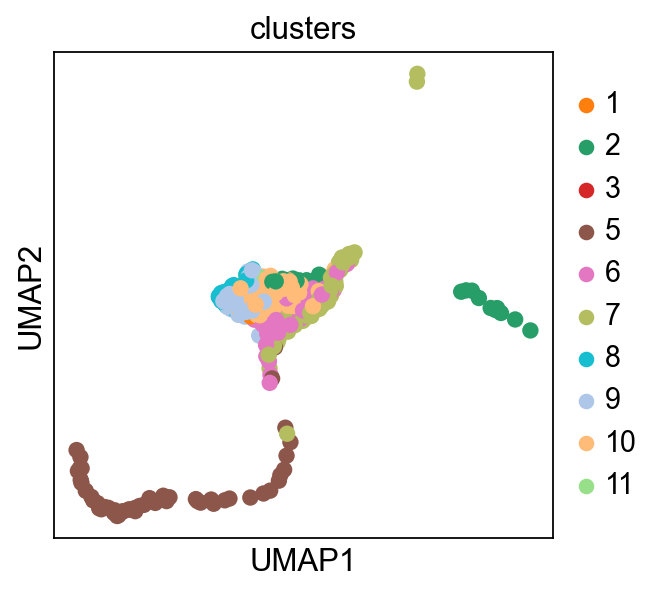

In [83]:
ax=sc.pl.umap(adata_NC_sub,color="clusters",show=False)
si_NC=ax.collections[0].get_sizes()[0]/2

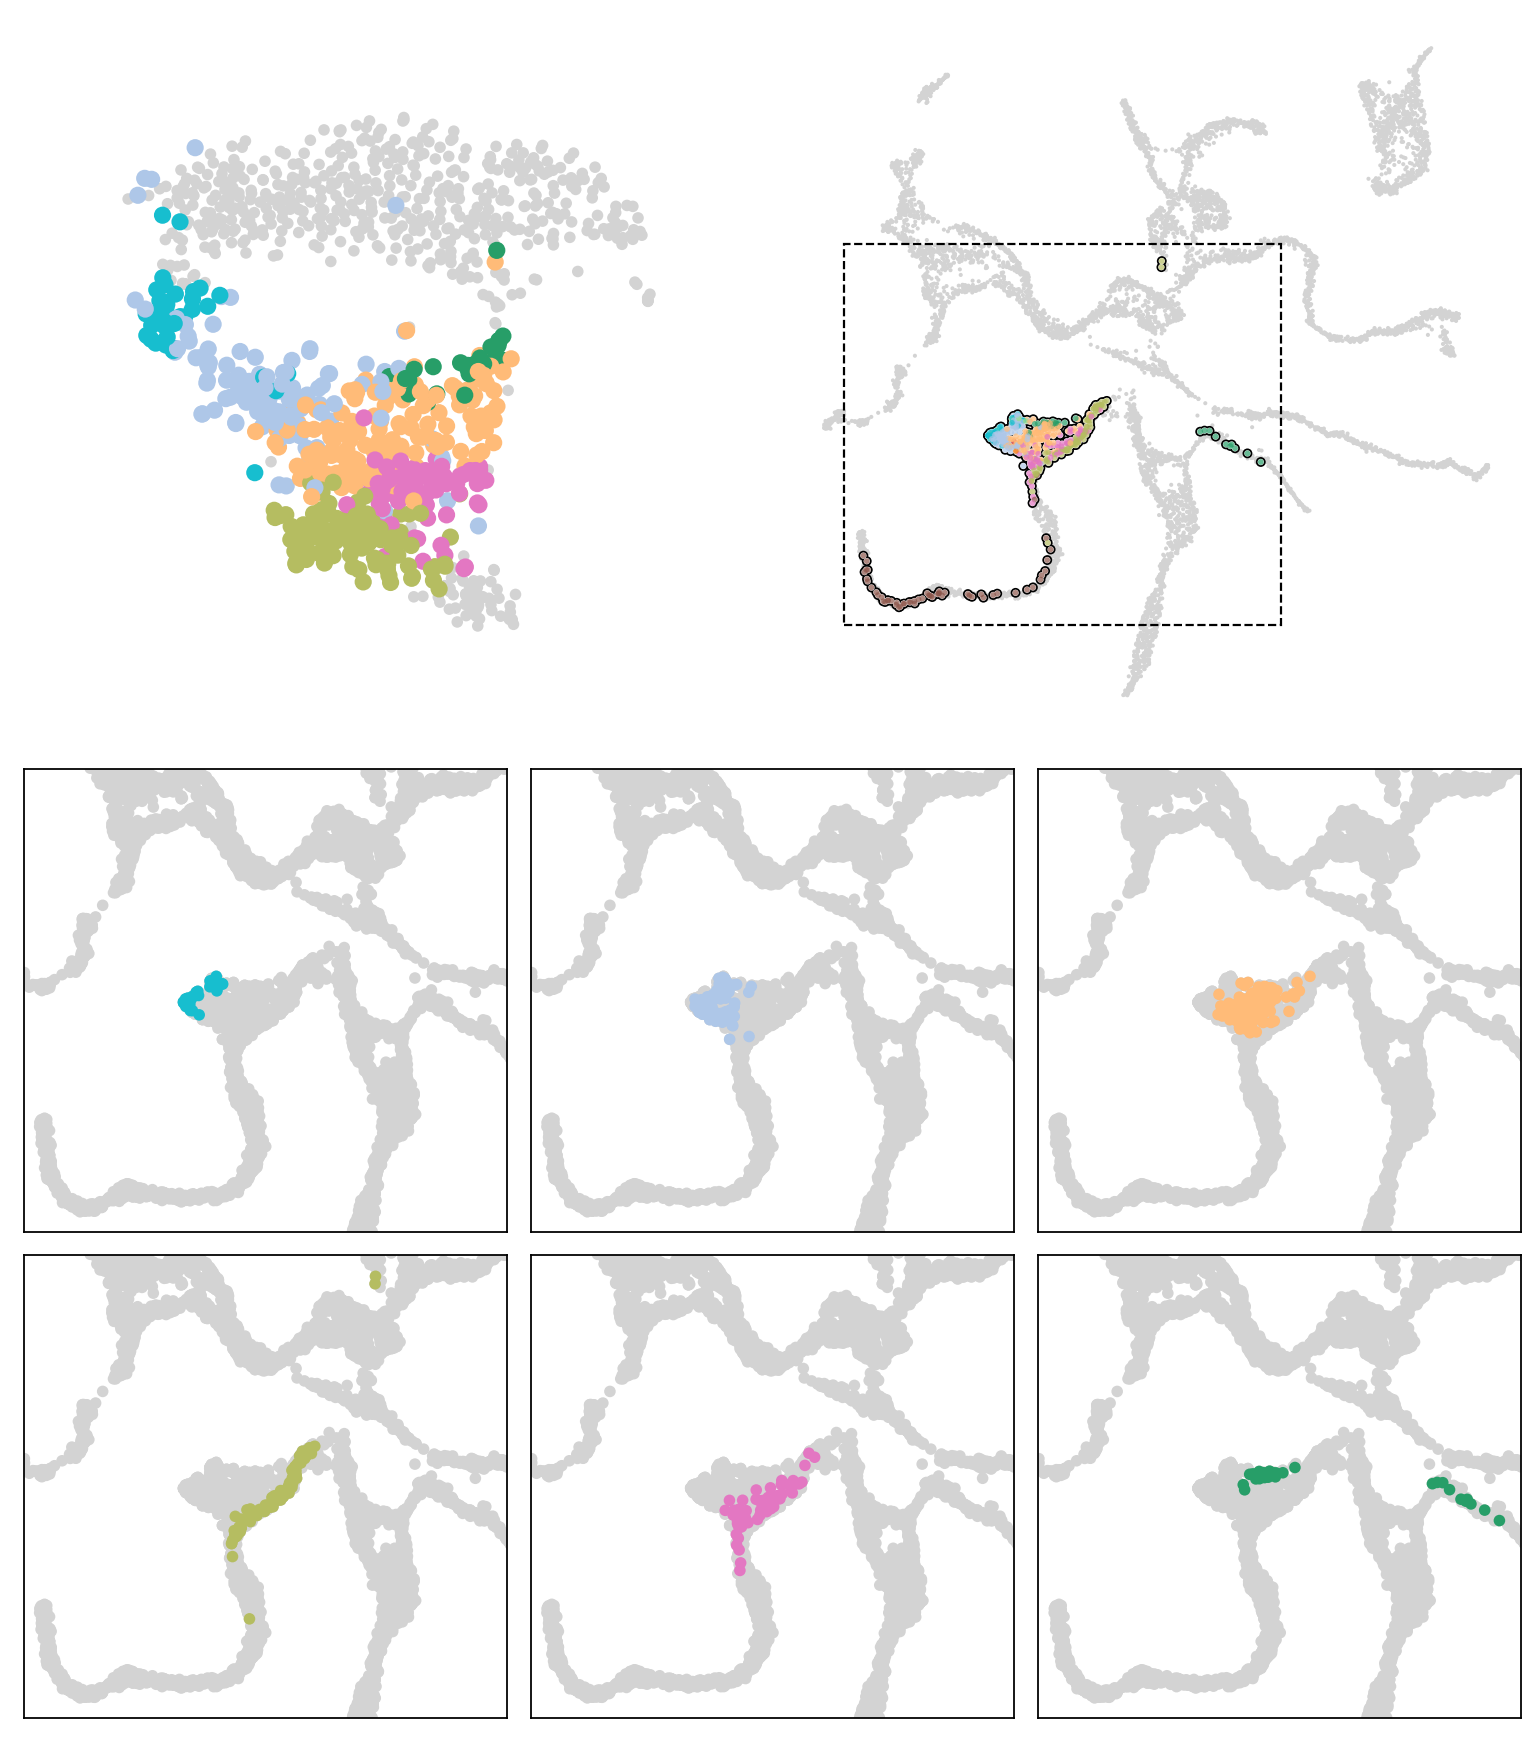

In [84]:
from matplotlib import gridspec
fig_height=plt.rcParams["figure.figsize"][0]

fig = plt.figure(figsize=((fig_height*3, fig_height*3.5)))

gs0 = gridspec.GridSpec(2,1,wspace=0.05,hspace=0.05, height_ratios=[1.5,2])

gs00 = gridspec.GridSpecFromSubplotSpec(1,2,wspace=0.05,hspace=0.05, subplot_spec=gs0[0])
 
ax = fig.add_subplot(gs00[0])
sc.pl.tsne(adata_NC,ax=ax,show=False,frameon=False,title="",legend_loc="none")
sc.pl.tsne(adata_NC[adata_NC.obs.clusters.isin(["8","9","10","7","6","2"])],color="clusters",
           ax=ax,show=False,frameon=False,title="",legend_loc="none")
ax.margins(x=.2, y=.2)
ax = fig.add_subplot(gs00[1])

from matplotlib.patches import Rectangle
sc.pl.umap(adata,show=False,ax=ax)
si=ax.collections[0].get_sizes()
sc.pl.umap(adata_NC_sub,color="clusters",ax=ax,size=si[0]*2,legend_loc="none",
           add_outline=True,title="",frameon=False,show=False)

rec=Rectangle((xlim[0],ylim[0]),xlim[1]-xlim[0],ylim[1]-ylim[0],fill=None, alpha=1,linestyle="--")
ax.add_artist(rec)

gs00 = gridspec.GridSpecFromSubplotSpec(2,3,wspace=0.05,hspace=0.05, subplot_spec=gs0[1])

for i,c in enumerate(["8","9","10","7","6","2"]):
    ax = fig.add_subplot(gs00[i])
    sc.pl.umap(adata_NC_sub,color="clusters",groups=[c],size=si_NC,
               show=False,zorder=100,legend_loc="none",ax=ax)
    si=ax.collections[0].get_sizes()
    sc.pl.umap(adata,size=si_NC,ax=ax,show=False)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.savefig("figures/figev3a.pdf",bbox_inches="tight")

In [85]:
sc.tl.rank_genes_groups(adata,"Hub_leiden",method="wilcoxon",pts=True)

In [86]:
Hub_module=sc.get.rank_genes_groups_df(adata,"True").set_index("names").iloc[:20]

In [89]:
sc.pp.pca(adata_NC)
sc.pp.neighbors(adata_NC)
adata_NC

AnnData object with n_obs × n_vars = 1107 × 1169
    obs: 'clusters'
    uns: 'clusters_colors', 'pca', 'neighbors'
    obsm: 'X_tsne', 'X_pca'
    varm: 'PCs'
    layers: 'weights'
    obsp: 'distances', 'connectivities'

In [90]:
import scipy.sparse as sp
import pandas as pd
fpm=pd.read_table("http://pklab.med.harvard.edu/ruslan/neural_crest/fpm.txt",sep=" ").T
adata_NC=sc.AnnData(fpm.loc[adata_NC.obs_names],
                    obs=adata_NC.obs,
                    obsm=adata_NC.obsm,
                    obsp=adata_NC.obsp,
                    uns=adata_NC.uns)
adata_NC.X=sp.csr_matrix(adata_NC.X)

In [91]:
sc.tl.score_genes(adata_NC,Hub_module.index)

saving figure to file figures/fig4c.pdf


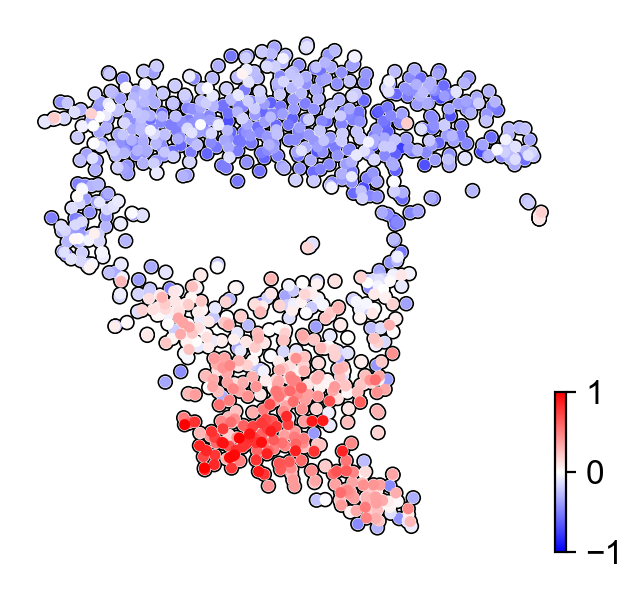

In [92]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5),dpi_save=300)
scv.pl.tsne(adata_NC,color="score",title="",cmap="bwr",vmax=1,vmin=-1,
            add_outline=True,outline_width=(0.15, 0.05),save="figures/figev3c.pdf")

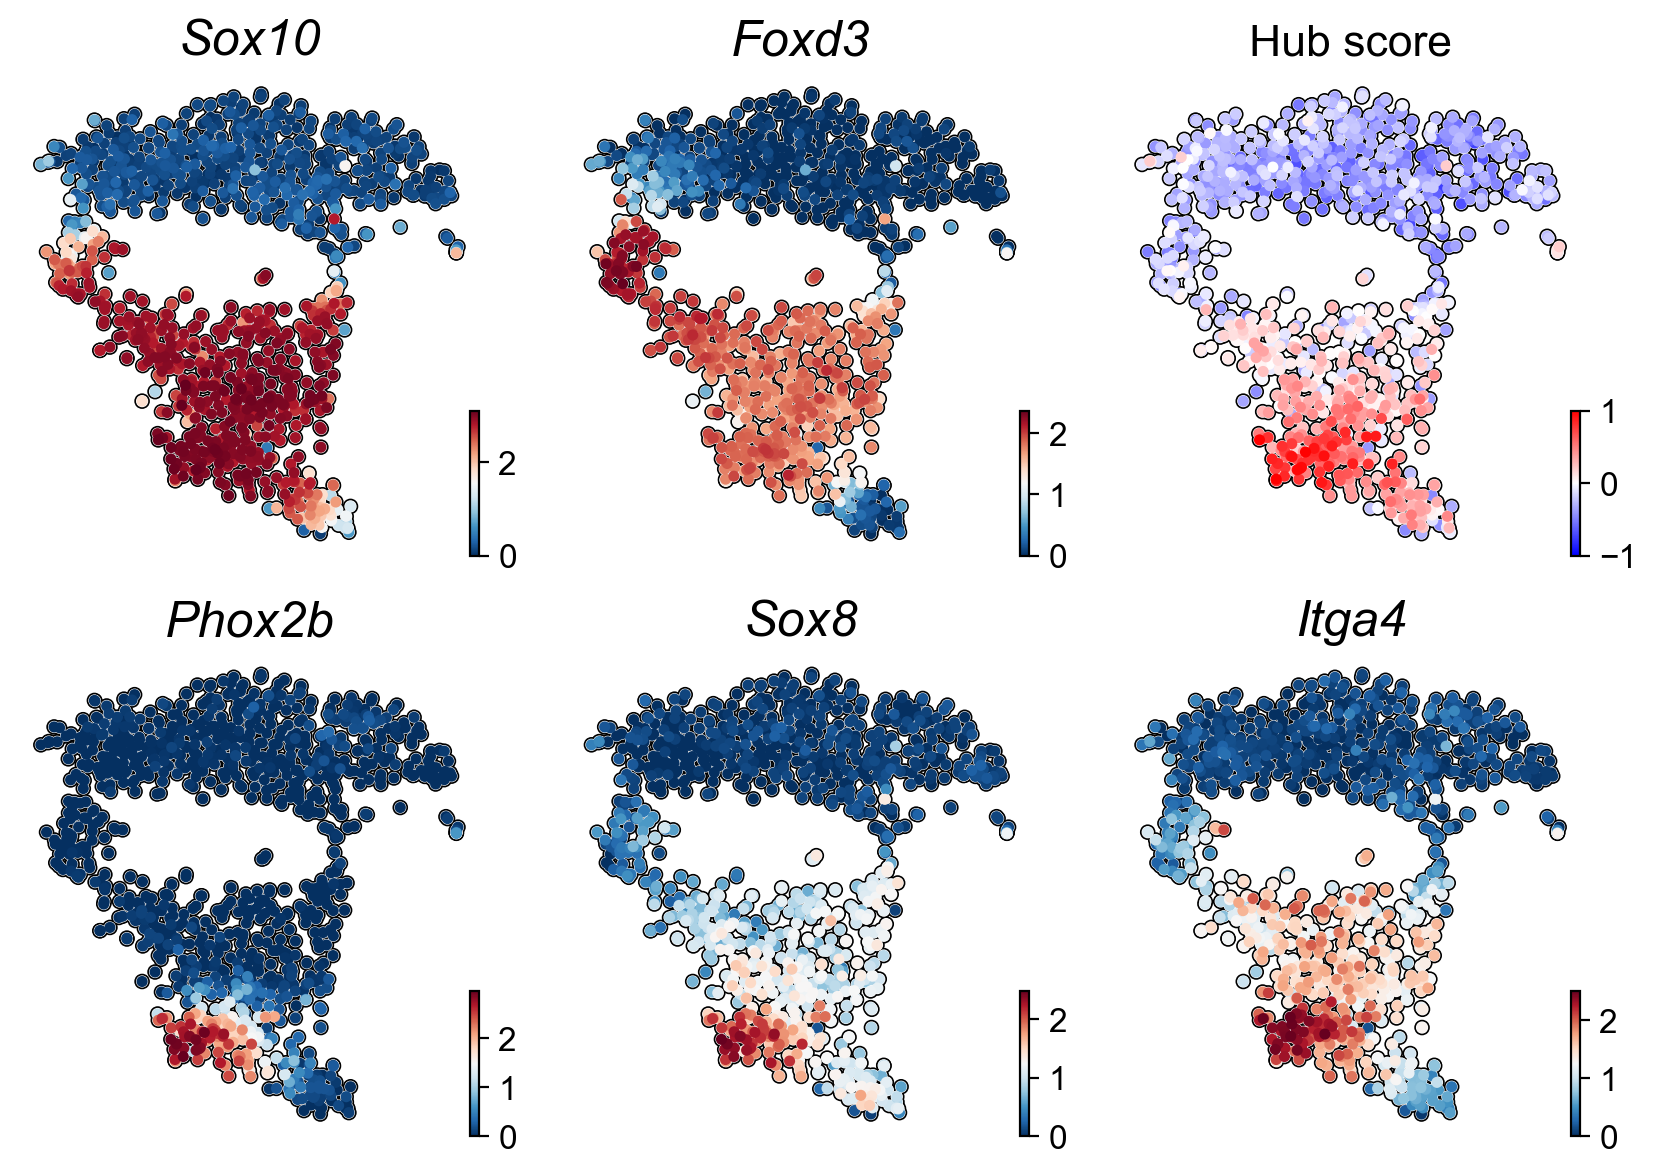

In [142]:
fig, axs=plt.subplots(2,3,figsize=(10,7))
axs=axs.ravel()

i=0
for g in ["Sox10","Foxd3"]:
    scv.pl.tsne(adata_NC,color=g,title="",cmap="RdBu_r",ax=axs[i],show=False,
            add_outline=True,outline_width=(0.15, 0.05),smooth=True)
    axs[i].set_title(g,style="italic",size=18)
    i=i+1
    
scv.pl.tsne(adata_NC,color="score",title="",cmap="bwr",vmax=1,vmin=-1,ax=axs[i],show=False,
            add_outline=True,outline_width=(0.15, 0.05))
axs[i].set_title("Hub score",size=16)
i=i+1
for g in ["Phox2b","Sox8","Itga4"]:
    scv.pl.tsne(adata_NC,color=g,title="",cmap="RdBu_r",ax=axs[i],show=False,
            add_outline=True,outline_width=(0.15, 0.05),smooth=True)
    axs[i].set_title(g,style="italic",size=18)
    i=i+1
    
plt.savefig("figures/figev3c.pdf",bbox_inches="tight")

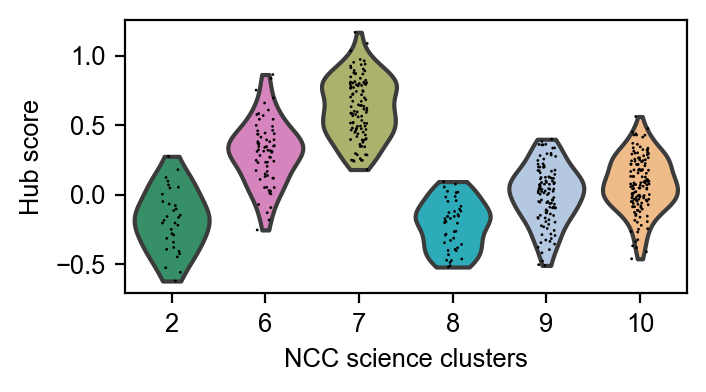

In [166]:
scv.set_figure_params(figsize=(4,1.8),fontsize=10)
ax=sc.pl.violin(adata_NC[adata_NC.obs.clusters.isin(["8","9","10","7","6","2"])],"score","clusters",show=False)
ax.set_xlabel("NCC science clusters")
ax.set_ylabel("Hub score")
plt.savefig("figures/figev3d.pdf",bbox_inches="tight")

In [109]:
sc.tl.rank_genes_groups(adata_NC,"clusters",groups=["6"])

In [110]:
glial_module=sc.get.rank_genes_groups_df(adata_NC,"6").names[:20].values

In [111]:
sc.tl.score_genes(adata,glial_module)

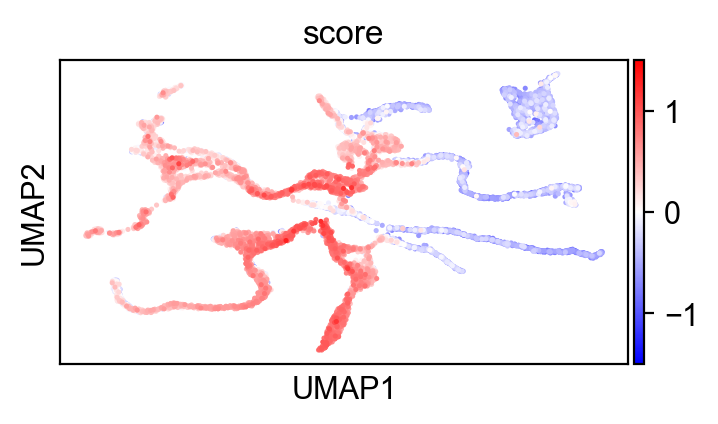

In [112]:
sc.pl.umap(adata,color="score",vmax=1.5,vmin=-1.5,cmap="bwr")

In [146]:
fname="figEV3"

In [167]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=400mm,paperwidth=210mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 

\raggedright \begin{minipage}[t]{0.61\textwidth}
\raggedright \textbf{A} \textcolor{Blue}{Science annotation projected on current embedding}
\includegraphics[trim=0 0 0 .2in,clip,width=1\textwidth]{figures/figev3a.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{0.39\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{Overlap of markers vs other fates}
\begin{center}
\includegraphics[trim=0 .6in 0 .2in,width=.85\textwidth]{figures/figev3b.pdf}
\end{center}
\raggedright \textbf{C} \textcolor{Blue}{Hub scoring on science tSNE}
\includegraphics[width=1\textwidth]{figures/figev3c.pdf}
\raggedright \textbf{D} \textcolor{Blue}{Hub scoring on science clusters}
\includegraphics[width=1\textwidth]{figures/figev3d.pdf}
\end{minipage}\hfill


\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./figEV4.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist

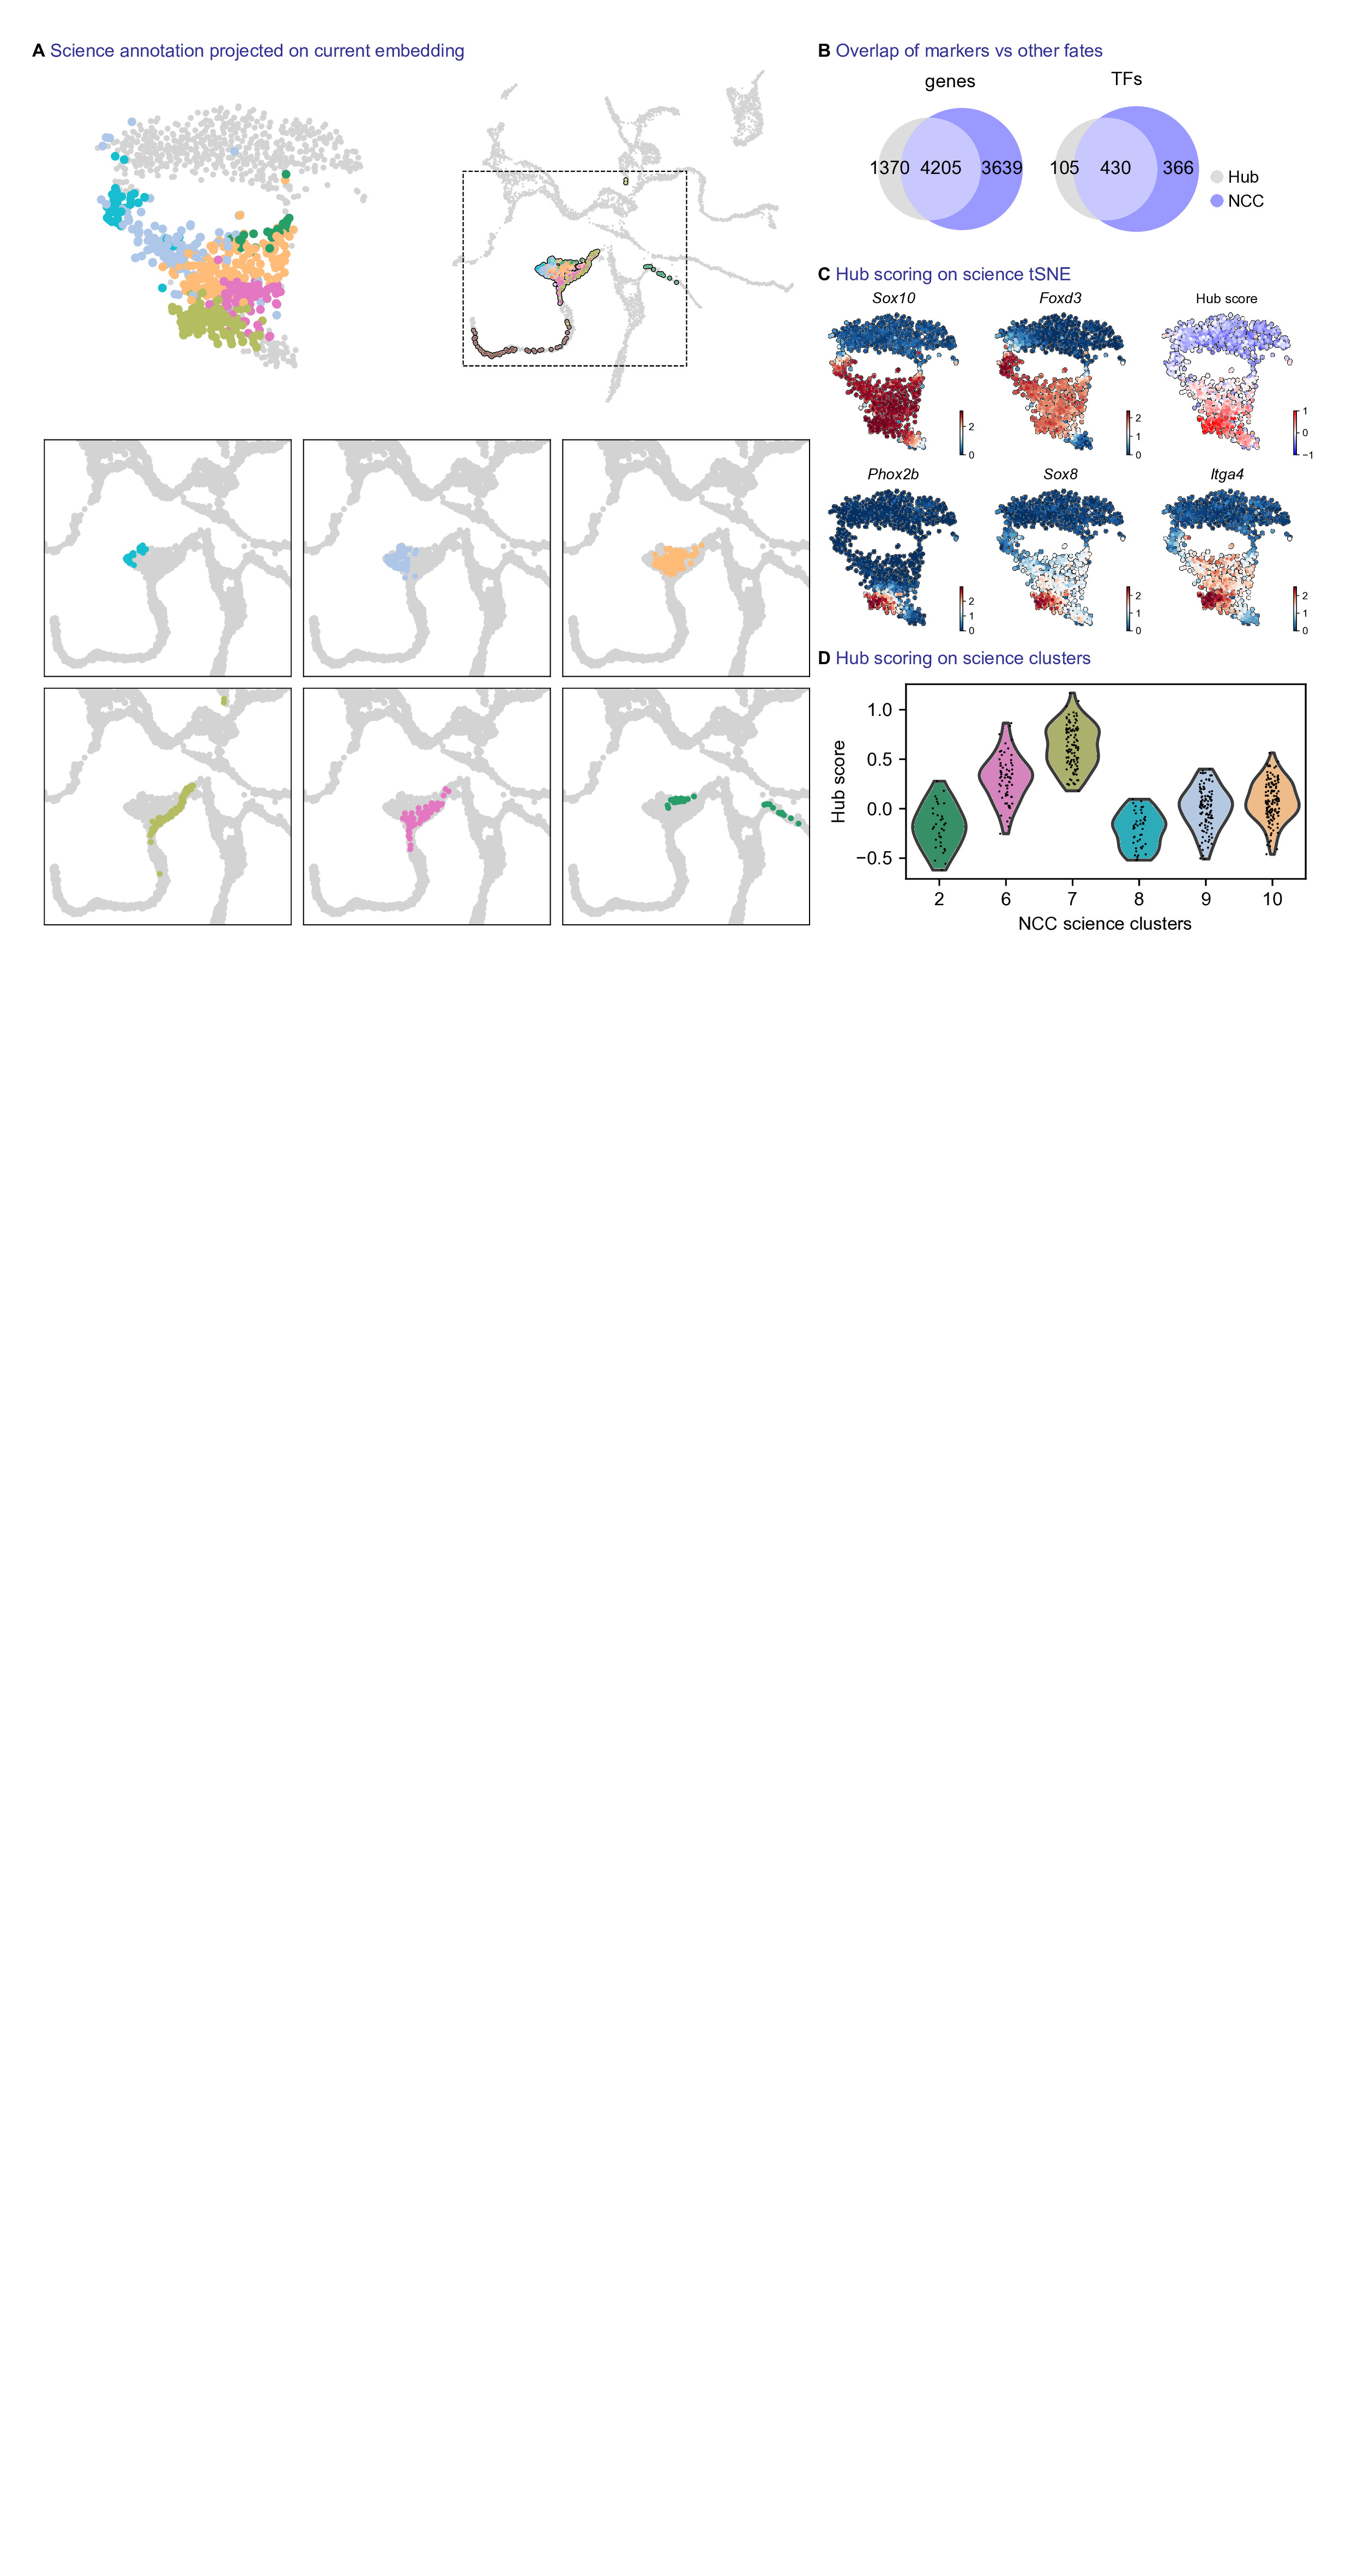

In [168]:
from IPython.display import Image
Image(filename=fname+'.jpg') 